# Midterm Mushroom Dataset

## Author: Houston Asher-Laws

## November 11th 2025

in this mushroom dataset I will predict whether a mushroom is edible or posisonous based on it's characteristics.

In [16]:
# This is a Python cell
# All imports should be at the top of the notebook
# This cell will be executed when the notebook is loaded

# Import pandas for data manipulation and analysis (we might want to do more with it)
import pandas as pd 
# Import matplotlib for creating static visualizations
import matplotlib.pyplot as plt 
# Import seaborn for statistical data visualization (built on matplotlib)
import seaborn as sns   
# Import the California housing dataset from sklearn
from sklearn.datasets import fetch_california_housing

# Import train_test_split for splitting data into training and test sets
from sklearn.model_selection import train_test_split
# Import LinearRegression for building a linear regression model
from sklearn.linear_model import LinearRegression  
# Import performance metrics for model evaluation
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error


from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [17]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 
  
# data (as pandas dataframes) 
X = mushroom.data.features 
y = mushroom.data.targets 
  
# metadata 
print(mushroom.metadata) 
  
# variable information 
print(mushroom.variables) 


{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

## Section 1. Import and Inspect the Data

### 1.1 Load the dataset and display the first 10 rows.

In [18]:
mushroom = fetch_ucirepo(id=73)
data_frame = pd.concat([mushroom.data.features, mushroom.data.targets], axis=1)
data_frame.head(10)


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
5,x,y,y,t,a,f,c,b,n,e,...,w,w,p,w,o,p,k,n,g,e
6,b,s,w,t,a,f,c,b,g,e,...,w,w,p,w,o,p,k,n,m,e
7,b,y,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,s,m,e
8,x,y,w,t,p,f,c,n,p,e,...,w,w,p,w,o,p,k,v,g,p
9,b,s,y,t,a,f,c,b,g,e,...,w,w,p,w,o,p,k,s,m,e


### 1.2 Check for missing values and display summary statistics.

In [19]:
data_frame.info()
data_frame.describe()
data_frame.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
poisonous                      0
dtype: int64

Reflection 1: What do you notice about the dataset? Are there any data issues?

I notice that there are about 8124 entires in the data. I notice that every data type is an object. I noticed that stalk-root has missing vaules.

## Section 2. Data Exploration and Preparation

## 2.1 Explore data patterns and distributions

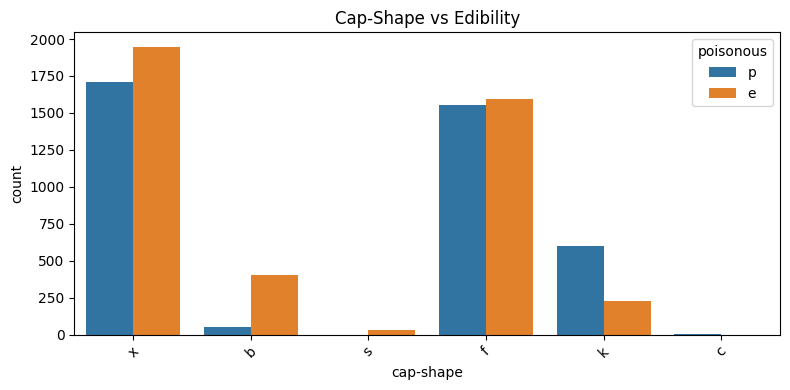

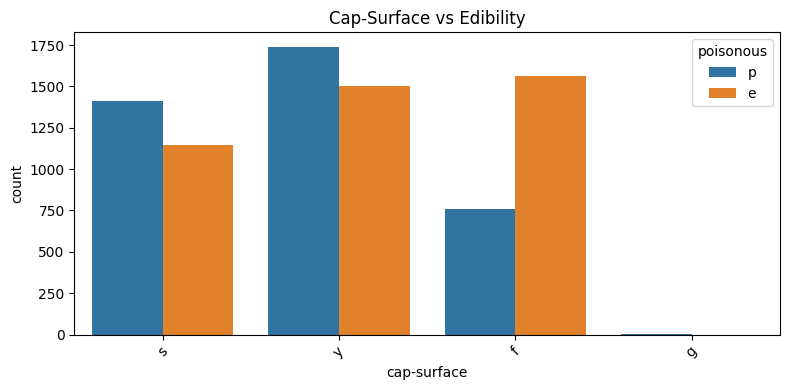

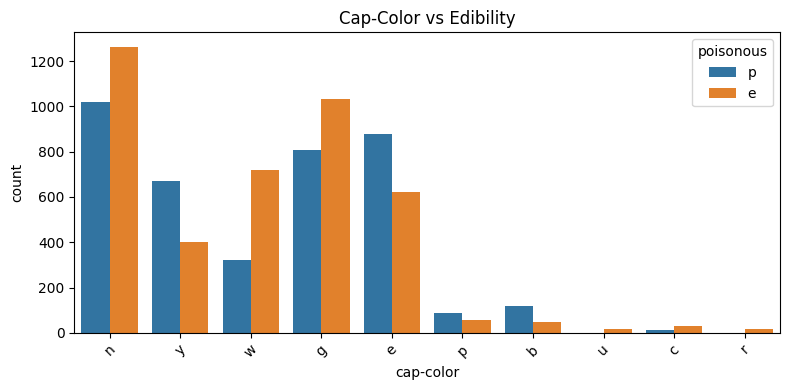

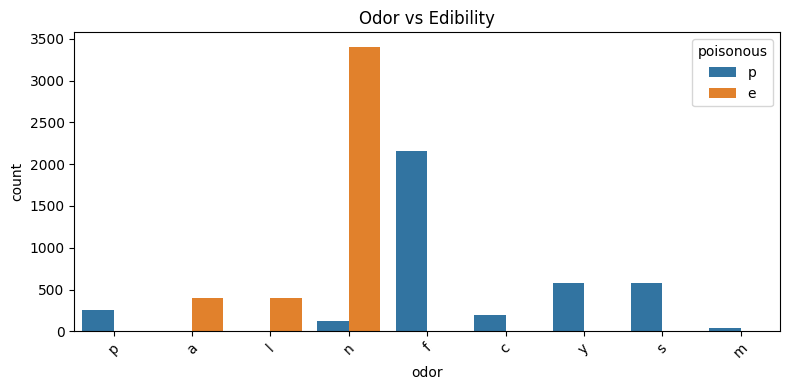

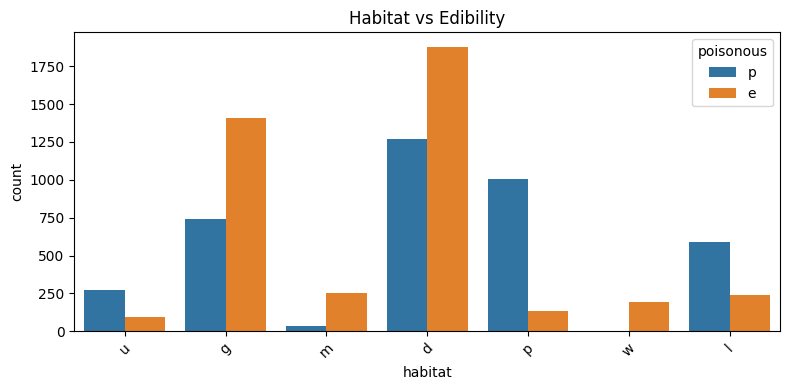

In [20]:



categorical_features = ['cap-shape', 'cap-surface', 'cap-color', 'odor', 'habitat']

for feature in categorical_features:
    plt.figure(figsize=(8,4))
    sns.countplot(x=feature, hue='poisonous', data=data_frame)
    plt.title(f"{feature.title()} vs Edibility")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [1]:
plt.figure(figsize=(10,8))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap (Encoded Data)")
plt.show()

NameError: name 'plt' is not defined

## 2.2 Handle missing values and clean data

In [ ]:
# Check for missing values
data_frame.isna().sum()


cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
poisonous                      0
dtype: int64

In [ ]:
data_frame['stalk-root'].fillna(data_frame['stalk-root'].mode()[0], inplace=True)

data_frame.isna().sum()

C:\Users\houst\AppData\Local\Temp\ipykernel_26020\2461072698.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_frame['stalk-root'].fillna(data_frame['stalk-root'].mode()[0], inplace=True)


cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
poisonous                   0
dtype: int64

In [ ]:

df_encoded = data_frame.copy()

le = LabelEncoder()

for col in df_encoded.columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,5,2,4,1,6,1,0,1,4,0,...,7,7,0,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,4,0,...,7,7,0,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,5,0,...,7,7,0,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,5,0,...,7,7,0,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,0,1,0


## 2.3 Feature selection and engineering

Does not need feaure Engineering.

Reflection 2: What patterns or anomalies do you see? Do any features stand out? What preprocessing steps were necessary to clean and improve the data? Did you create or modify any features to improve performance?

I saw that mustrooms that had bad odors will almost always poisonous. The order feature was the one that standed out to me. Just had to clean up the stalk-root column. I did not have modify and of the features.

## Section 3. Feature Selection and Justification

### 3.1 Choose features and target

poisonous will be the target while oder, spore-print-color, grill color, brusies, gill size and habitat will be the input.

## 3.2 Define X and y

In [ ]:
# poisonous will be the target while oder, grill color, brusies, gill size and habitat will be the input.
X = df_encoded[['odor', 'gill-color', 'bruises', 'gill-size', 'habitat']]
y = df_encoded['poisonous']

Reflection 3: Why did you choose these features? How might they impact predictions or accuracy?

I choose these features like odor, habitat, gill-size, bruises, and gill-color because these are features that can determine if the mustroom is posinsonous or not.

## Section 4. Train a Model (Classification: Choose 1: Decision Tree, Random Forest, Logistic Regression)

### 4.1 Split the data into training and test sets using train_test_split (or StratifiedShuffleSplit if class imbalance is an issue).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 6499
Testing set size: 1625


### 4.2 Train model using Scikit-Learn model.fit() method.

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

print("Decision Tree Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Decision Tree Test Accuracy: 0.9969230769230769

Confusion Matrix:
 [[839   3]
 [  2 781]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:
accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9969
Precision: 0.9962
Recall: 0.9974
F1 Score: 0.9968


Reflection 4: How well did the model perform? Any surprises in the results?

It performed well no surprises that I can see.

## Section 5. Improve the Model or Try Alternates (Implement a Second Option)

### 5.1 Train an alternative classifier (e.g., Decision Tree, Random Forest, Logistic Regression) OR adjust hyperparameters on the original model.

In [ ]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)

log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1 Score: {f1_lr:.4f}")

Logistic Regression Accuracy: 0.8782
Precision: 0.8679
Recall: 0.8812
F1 Score: 0.8745


### 5.2 Compare performance of all models across the same performance metrics.

In [ ]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1 Score: {f1_lr:.4f}")

Accuracy: 0.9969
Precision: 0.9962
Recall: 0.9974
F1 Score: 0.9968
Logistic Regression Accuracy: 0.8782
Precision: 0.8679
Recall: 0.8812
F1 Score: 0.8745


Reflection 5: Which model performed better? Why might one classifier be more effective in this specific case?

it looks like the decesion tree performed better. The decision tree would be better used to handle categorical and nonlinear data.

## Section 6. Final Thoughts & Insights

## 6.1 Summarize findings.

In this project I found that stalk root column was miss vaules and used label encoding to convert all the categorical features into numberic. For the modeling I use both Decision tree classifer and Logistic regression model. I saw that the acccuracy for the decision tree was 0.99 and the logistic regression was 0.87.

### 6.2 Discuss challenges faced.

the biggest challange that I faced was that this used categorical features instead of numberic. In my previous project of using the tatanic I did not have to face this challange but in this project I had to.

### 6.3 If you had more time, what would you try next?

If I had more time I would learn and test more the Models. I would want to learn about more about the Random Forest model. 

Reflection 6: What did you learn from this project?

I learned more about Models and learn about categorical features. I learned how categorical features will different from the numberic ones.